## Predicting the Presence of West Nile Virus in Chicago

> This notebook shows the prediction of the number of mosquitos present which is in turn used to predict the presence of West Nile Virus in Chicago.

##### Step by Step Summary  of Notebook 
    1. Import libraries
    2. Read in Training Dataset, explore data provided and create base model with the dataset.
    3. Extensive EDA on Training dataset 
    4. Read in Weather Dataset and do extensive EDA.
    5. Combine Training and Weather Dataset
    6. Divide combined dataset into X and y removing the number of mosquitos and west nile presence in data.
    7. Train-Test-Split and stratify y.
    8. Create models using for predicting number of mosquitos first.
    9. Predict number of mosquitos using the best model
    10. Read in Testing Dataset from Kaggle, extensive EDA and match columns to Training columns.
    11. Add predictions of number of mosquitos to Kaggle testing data
    12. Create models to predict presence of west nile virus.
    13. Predict the presence of virus on training data
    14. Predict the presence of virus in kaggle data using the best model 
    15. Read spray data and do some EDA to see the effect of spay on affected areas...

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datetime import datetime

%matplotlib inline


### Training Dataset

In [2]:
# Reading Training Dataset
df_train = pd.read_csv('../input/train.csv')
df_train.shape
df_train.head(2)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9,1,0


In [3]:
df_train.columns

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object')

In [4]:
# dropping addresses and block numbers because they approximate location which translates to the longitude and lattitude. 
# in essence, the block and address are all represented in lattitude and longitude values.
# Also based on tha addressAccuracy, the mean and 24% IQR are both above 7 with 9 being the max value. this shows the 
# addresses and lat/long. approximately accurate. Hence, feel confortable using the lat/long. values.
df_train = df_train.drop(['Address', 'Street', 'Block', 'AddressNumberAndStreet'], axis=1)

In [5]:
df_train.head()

,Date,Species,Trap,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,9,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,9,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,9,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,8,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,8,4,0


In [6]:
df_train.describe()

,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000
mean,41.841139,-87.699908,7.819532,12.853512,0.052446
std,0.112742,0.096514,1.452921,16.133816,0.222936
min,41.644612,-87.930995,3.000000,1.000000,0.000000
25%,41.732984,-87.760070,8.000000,2.000000,0.000000
50%,41.846283,-87.694991,8.000000,5.000000,0.000000
75%,41.954690,-87.627796,9.000000,17.000000,0.000000
max,42.017430,-87.531635,9.000000,50.000000,1.000000


In [7]:
# Also dropping AddressAccuracy because its describing the accuracy of our address and since address 
# it removed should also be gone. Plus it holds no real value to our y at this point. 
df_train = df_train.drop(['AddressAccuracy'], axis=1)

In [8]:
# Converting date to a datetime object
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 7 columns):
Date            10506 non-null datetime64[ns]
Species         10506 non-null object
Trap            10506 non-null object
Latitude        10506 non-null float64
Longitude       10506 non-null float64
NumMosquitos    10506 non-null int64
WnvPresent      10506 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 492.5+ KB


In [9]:
df_train_categories = list(df_train.select_dtypes(include=['object']).columns)

In [10]:
# Getting Dummies on the categorical train data
df_train_dummies = pd.get_dummies(df_train[df_train_categories])
df_train_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 143 entries, Species_CULEX ERRATICUS to Trap_T903
dtypes: uint8(143)
memory usage: 1.4 MB


In [11]:
df_train_numeric = df_train._get_numeric_data()
df_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 4 columns):
Latitude        10506 non-null float64
Longitude       10506 non-null float64
NumMosquitos    10506 non-null int64
WnvPresent      10506 non-null int64
dtypes: float64(2), int64(2)
memory usage: 328.4 KB


In [12]:
display(df_train.head())

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0


In [13]:
X_df_train = pd.concat([df_train_dummies, df_train_numeric], axis=1)

In [14]:
y_df_train = df_train['WnvPresent']
df_train.corrwith(y_df_train).sort_values()

Longitude      -0.060345
Latitude        0.028697
NumMosquitos    0.196820
WnvPresent      1.000000
dtype: float64

In [15]:
species = df_train.groupby(['Species']).sum()

In [16]:
df_train.groupby(['Trap']).sum().sort_values('WnvPresent', ascending=False)[:15]

,Latitude,Longitude,NumMosquitos,WnvPresent
Trap,,,,
T900,31481.016750,-65917.961250,15386,66
T115,22586.987136,-47479.125204,21668,41
T002,7761.617650,-16243.183335,3710,18
T138,13102.110010,-27501.819682,9936,16
T003,5119.637524,-10706.431958,1346,14
T011,5578.667577,-11681.757479,1311,11
T225,4299.570406,-9036.337805,2014,11
T128,6672.731520,-14010.506560,3315,11
T903,5874.091860,-12310.339300,2327,10


In [17]:
df_train.corrwith(df_train['WnvPresent']).sort_values()

Longitude      -0.060345
Latitude        0.028697
NumMosquitos    0.196820
WnvPresent      1.000000
dtype: float64

### Plotting the datasets

###### Map showing the Spread of West Nile Virus in Chicago

> **This map also shows the the most prevalent virus speicie** - ***The CULEX PIPIENS***

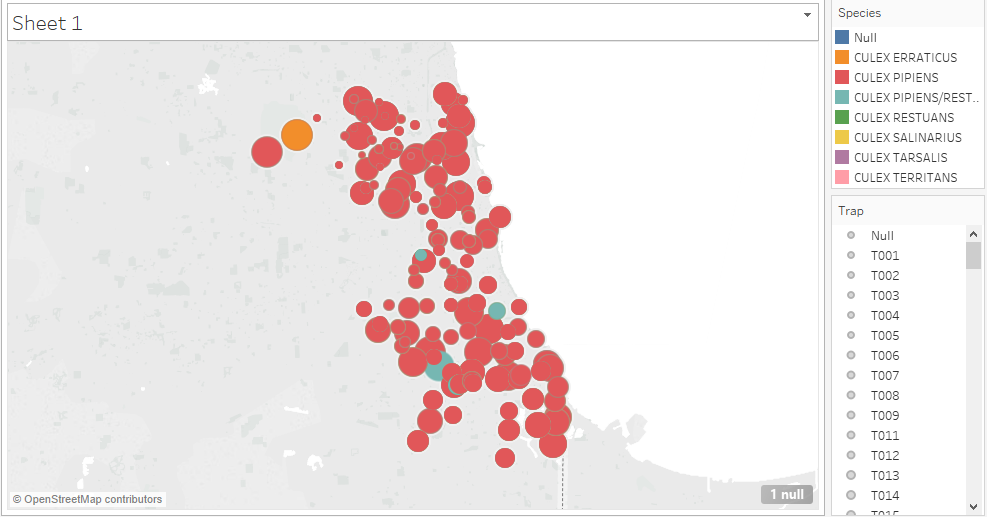

In [19]:
df_train.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0


### Model df_train with a base model - Logistic Regression

In [20]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [21]:
X = X_df_train.drop('WnvPresent', axis=1)
y = y_df_train
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [22]:
#lr = LogisticRegressionCV()

pipe = Pipeline([
   # ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lr', LogisticRegressionCV())
])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [23]:
y_train.value_counts(normalize=True)

0    0.947582
1    0.052418
Name: WnvPresent, dtype: float64

In [24]:
y_test.value_counts(normalize=False)

0    2489
1     138
Name: WnvPresent, dtype: int64

In [25]:
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.9484706180987434, 0.9467072706509326)

### Weather Dataset

In [26]:
df_weather = pd.read_csv('../input/weather.csv')
df_weather.shape
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [27]:
# Check for why Heat is an object. Found the culprit to be 'M' within 11 observations
df_weather['Heat'].value_counts()

0     1870
4       88
1       86
2       81
8       67
3       66
5       61
15      57
7       49
12      49
10      48
11      48
13      46
9       46
6       45
14      36
16      29
20      28
19      24
18      24
21      19
17      17
23      15
22      12
M       11
24       7
25       5
26       4
28       2
27       2
29       2
Name: Heat, dtype: int64

In [28]:
# Checking for values of 'M' - Missing Data and 'T' - Trace amounts and replacing with NaN's
df_weather = df_weather.replace(['M', 'T', ' T', '  T'], np.NaN)

In [29]:
# filling the NaN's with -99
df_weather.fillna(-99, inplace= True)

In [30]:
df_weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1         float64
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [31]:
df_weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [32]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null float64
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(2), int64(5), object(15)
memory usage: 333.5+ KB


In [33]:
# looking at the transposed view, we can conclude that certain varies will play very little effect on our model
# hence we are going to dropping some columns the following 
df_weather.T

,0,1,2,3,4,5,6,7,8,9,...,2934,2935,2936,2937,2938,2939,2940,2941,2942,2943
Station,1,2,1,2,1,2,1,2,1,2,...,1,2,1,2,1,2,1,2,1,2
Date,2007-05-01,2007-05-01,2007-05-02,2007-05-02,2007-05-03,2007-05-03,2007-05-04,2007-05-04,2007-05-05,2007-05-05,...,2014-10-27,2014-10-27,2014-10-28,2014-10-28,2014-10-29,2014-10-29,2014-10-30,2014-10-30,2014-10-31,2014-10-31
Tmax,83,84,59,60,66,67,66,78,66,66,...,77,79,68,66,49,49,51,53,47,49
Tmin,50,52,42,43,46,48,49,51,53,54,...,51,54,45,48,36,40,32,37,33,34
Tavg,67,68,51,52,56,58,58,-99,60,60,...,64,67,57,57,43,45,42,45,40,42
Depart,14,-99,-3,-99,2,-99,4,-99,5,-99,...,16,-99,10,-99,-4,-99,-4,-99,-6,-99
DewPoint,51,51,42,42,40,40,41,42,38,39,...,51,52,38,40,32,34,34,35,25,29
WetBulb,56,57,47,47,48,50,50,50,49,50,...,58,59,47,48,40,42,40,42,33,36
Heat,0,0,14,13,9,7,7,-99,5,5,...,1,0,8,8,22,20,23,20,25,23
Cool,2,3,0,0,0,0,0,-99,0,0,...,0,2,0,0,0,0,0,0,0,0


In [34]:
#df_weather['Cool'].value_counts()

###### The Effects of Precipitation
Show that area of high precipitation has a lower presence of west nile virus while areas of low or zero precipitation has a higher presence of wet nile virus. specifically the Culex Pipiens species which is the most prevalent. 


 -  The areas with heavy dense black circles show the areas with low precipitation 
 -  While areas with smaller black dots show area of higher precipitation 

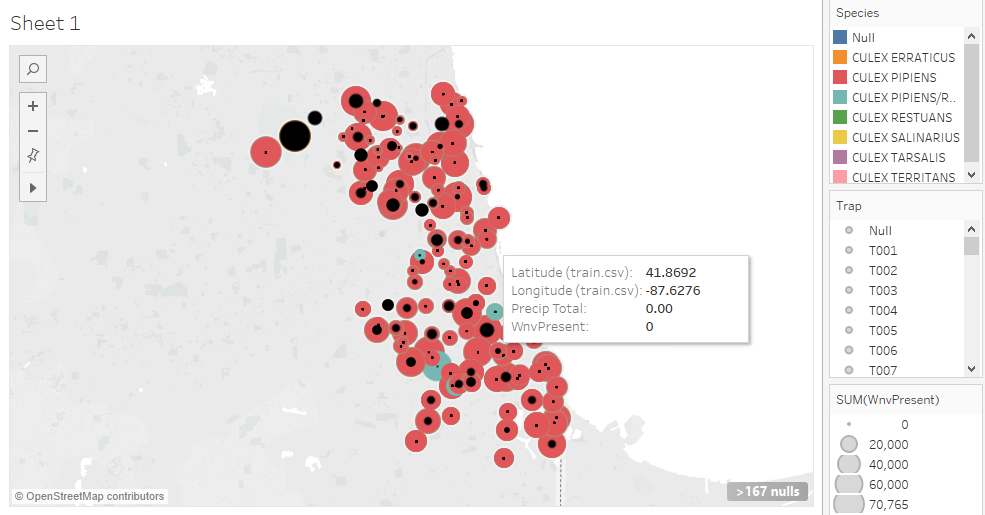

In [35]:
# We are dropping thefollowing columns:
# 'Sunrise', 'Sunset', 'CodeSum' - They provide no real values to our model.
# 'Water1'- since its the same for all
# 'Depart', 'Depth', 'SnowFall'- these values are consistently missing/Trace for one station
  
df_weather = df_weather.drop(['Sunrise', 'Sunset', 'SnowFall','CodeSum', 'Water1', 'Depart', 'Depth'], axis=1)

In [36]:
# Converting date to a datetime object
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 15 columns):
Station        2944 non-null int64
Date           2944 non-null datetime64[ns]
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(8)
memory usage: 253.0+ KB


In [37]:
# Converting the remaining object variables to floats since there values are all numbers
for column in df_weather.columns[1:]:
    if df_weather[column].dtype == 'object':
        df_weather[column] = df_weather[column].astype(float)
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,51,56.0,0.0,2.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,42,47.0,14.0,0.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,42,47.0,13.0,0.0,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,0.0,29.39,30.12,11.7,7,11.9


#### Combing train and weather data

In [38]:
# Combing both weather and train data after eda
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,51,56.0,0.0,2.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,42,47.0,14.0,0.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,42,47.0,13.0,0.0,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,0.0,29.39,30.12,11.7,7,11.9


In [39]:
df_train.head()

,Date,Species,Trap,Latitude,Longitude,NumMosquitos,WnvPresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0


In [40]:
# We are doing a left join which is the default because the train data is from 
# every other year of which the other years is what we are predicting 
# while the weather data has every year from 
df = df_train.join(df_weather.set_index('Date'), on='Date')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 10505
Data columns (total 21 columns):
Date            21012 non-null datetime64[ns]
Species         21012 non-null object
Trap            21012 non-null object
Latitude        21012 non-null float64
Longitude       21012 non-null float64
NumMosquitos    21012 non-null int64
WnvPresent      21012 non-null int64
Station         21012 non-null int64
Tmax            21012 non-null int64
Tmin            21012 non-null int64
Tavg            21012 non-null float64
DewPoint        21012 non-null int64
WetBulb         21012 non-null float64
Heat            21012 non-null float64
Cool            21012 non-null float64
PrecipTotal     21012 non-null float64
StnPressure     21012 non-null float64
SeaLevel        21012 non-null float64
ResultSpeed     21012 non-null float64
ResultDir       21012 non-null int64
AvgSpeed        21012 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(7), object(2)
memory usage: 3.4+ MB

In [42]:
# separating combined data into categorical and numeric data
df_categories = list(df.select_dtypes(include=['object']).columns)
df_numeric = df[(list(df.select_dtypes(exclude=['object', 'datetime']).columns))]
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 10505
Data columns (total 18 columns):
Latitude        21012 non-null float64
Longitude       21012 non-null float64
NumMosquitos    21012 non-null int64
WnvPresent      21012 non-null int64
Station         21012 non-null int64
Tmax            21012 non-null int64
Tmin            21012 non-null int64
Tavg            21012 non-null float64
DewPoint        21012 non-null int64
WetBulb         21012 non-null float64
Heat            21012 non-null float64
Cool            21012 non-null float64
PrecipTotal     21012 non-null float64
StnPressure     21012 non-null float64
SeaLevel        21012 non-null float64
ResultSpeed     21012 non-null float64
ResultDir       21012 non-null int64
AvgSpeed        21012 non-null float64
dtypes: float64(11), int64(7)
memory usage: 3.0 MB


In [43]:
df[df_categories].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 10505
Data columns (total 2 columns):
Species    21012 non-null object
Trap       21012 non-null object
dtypes: object(2)
memory usage: 328.3+ KB


In [44]:
# Getting dummies on the categorical data 
df_dummies = pd.get_dummies(df[df_categories])
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 10505
Columns: 143 entries, Species_CULEX ERRATICUS to Trap_T903
dtypes: uint8(143)
memory usage: 3.0 MB


In [45]:
# Combing both categorical and numeric data
df_new = pd.concat([df_dummies, df_numeric], axis=1)

In [46]:
df_new.head(5)

,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Trap_T001,Trap_T002,Trap_T003,...,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,0,0,1,0,0,0,0,0,1,0,...,58,65.0,0.0,9.0,0.0,29.39,30.11,5.8,18,6.5
0,0,0,1,0,0,0,0,0,1,0,...,59,66.0,0.0,12.0,0.0,29.44,30.09,5.8,16,7.4
1,0,0,0,1,0,0,0,0,1,0,...,58,65.0,0.0,9.0,0.0,29.39,30.11,5.8,18,6.5
1,0,0,0,1,0,0,0,0,1,0,...,59,66.0,0.0,12.0,0.0,29.44,30.09,5.8,16,7.4
2,0,0,0,1,0,0,0,0,0,0,...,58,65.0,0.0,9.0,0.0,29.39,30.11,5.8,18,6.5


In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 10505
Columns: 161 entries, Species_CULEX ERRATICUS to AvgSpeed
dtypes: float64(11), int64(7), uint8(143)
memory usage: 5.9 MB


   ##### Since our testing data does not include the number of musquito (NumMosquitos) We will be using our combined training and weather data to build a model that predicts the number of mosquitos which we will use on our test data. After we have corresponding values for our datasets then we will predict the Presence of West Nile Virus.


 


### Predicting Number of Mosquitos

In [48]:
X = df_new.drop(['NumMosquitos', 'WnvPresent'], axis=1)
y = df_new['NumMosquitos']

In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 10505
Columns: 159 entries, Species_CULEX ERRATICUS to AvgSpeed
dtypes: float64(11), int64(5), uint8(143)
memory usage: 5.6 MB


In [50]:
X_train.shape

X_test.shape

y_train.shape

y_test.shape

(2627,)

In [51]:
# Test_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)

#### Using Logistic Regression Model

In [52]:
pipe1 = Pipeline([
   # ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lr', LogisticRegressionCV())
])
pipe1.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0))])

In [53]:
# Logistic Regression Model performing very poorly, will be trying another model.
pipe1.score(X_train, y_train), pipe1.score(X_test, y_test)

(0.2943080144679231, 0.2906910336950314)

In [54]:
# mos_predictions = pipe.predict(X_test)

In [56]:
# pipe.named_steps['lr'].coef_

#### Using Gradient Boosting Model.

In [57]:
X = df_new.drop(['NumMosquitos', 'WnvPresent'], axis=1)
y = df_new['NumMosquitos']

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 10505
Columns: 159 entries, Species_CULEX ERRATICUS to AvgSpeed
dtypes: float64(11), int64(5), uint8(143)
memory usage: 5.6 MB


In [58]:
# Test_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify= y)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
pipe = Pipeline([
   # ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('xg', GradientBoostingClassifier())
])
pipe.fit(X_train, y_train)



Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xg', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0...      presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False))])

In [61]:
pipe.score(X_train, y_train), pipe.score(X_test, y_test)

(0.4719208071578146, 0.29697315819531694)

### Kaggle Testing Data

In [62]:
# Testing dataset
df_kaggle = pd.read_csv('../input/test.csv')
df_kaggle.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [63]:
df_kaggle = df_kaggle.drop(['Address', 'Street', 'Block', 'AddressNumberAndStreet','AddressAccuracy'], axis=1)

In [64]:
df_kaggle['Date'] = pd.to_datetime(df_kaggle['Date'])
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 6 columns):
Id           116293 non-null int64
Date         116293 non-null datetime64[ns]
Species      116293 non-null object
Trap         116293 non-null object
Latitude     116293 non-null float64
Longitude    116293 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.4+ MB


In [65]:
df_kaggle.head()

,Id,Date,Species,Trap,Latitude,Longitude
0,1,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.95469,-87.800991
1,2,2008-06-11,CULEX RESTUANS,T002,41.95469,-87.800991
2,3,2008-06-11,CULEX PIPIENS,T002,41.95469,-87.800991
3,4,2008-06-11,CULEX SALINARIUS,T002,41.95469,-87.800991
4,5,2008-06-11,CULEX TERRITANS,T002,41.95469,-87.800991


In [66]:
df_kaggle = df_kaggle[df_kaggle['Species'] !='UNSPECIFIED CULEX']

In [67]:
#df_kaggle.drop(['Id'], axis=1, inplace=True)

In [68]:
df_kaggle[df_kaggle['Species'] =='UNSPECIFIED CULEX']

,Id,Date,Species,Trap,Latitude,Longitude


#### Combining kaggle test and weather data

In [69]:
df_kaggle.shape

(101948, 6)

In [70]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,51,56.0,0.0,2.0,0.0,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,51,57.0,0.0,3.0,0.0,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,42,47.0,14.0,0.0,0.0,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,42,47.0,13.0,0.0,0.0,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,40,48.0,9.0,0.0,0.0,29.39,30.12,11.7,7,11.9


In [71]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 15 columns):
Station        2944 non-null int64
Date           2944 non-null datetime64[ns]
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null float64
DewPoint       2944 non-null int64
WetBulb        2944 non-null float64
Heat           2944 non-null float64
Cool           2944 non-null float64
PrecipTotal    2944 non-null float64
StnPressure    2944 non-null float64
SeaLevel       2944 non-null float64
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null float64
dtypes: datetime64[ns](1), float64(9), int64(5)
memory usage: 345.0 KB


In [72]:
# Combing both weather and train data after eda
df_weather_kaggle = df_kaggle.join(df_weather.set_index('Date'), on='Date')

In [73]:
df_weather_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203896 entries, 0 to 116292
Data columns (total 20 columns):
Id             203896 non-null int64
Date           203896 non-null datetime64[ns]
Species        203896 non-null object
Trap           203896 non-null object
Latitude       203896 non-null float64
Longitude      203896 non-null float64
Station        203896 non-null int64
Tmax           203896 non-null int64
Tmin           203896 non-null int64
Tavg           203896 non-null float64
DewPoint       203896 non-null int64
WetBulb        203896 non-null float64
Heat           203896 non-null float64
Cool           203896 non-null float64
PrecipTotal    203896 non-null float64
StnPressure    203896 non-null float64
SeaLevel       203896 non-null float64
ResultSpeed    203896 non-null float64
ResultDir      203896 non-null int64
AvgSpeed       203896 non-null float64
dtypes: datetime64[ns](1), float64(11), int64(6), object(2)
memory usage: 31.1+ MB


In [74]:
Id = df_weather_kaggle['Id']

In [75]:
df_weather_kaggle.drop(columns = 'Id', inplace=True)

In [1]:
df_weather_kaggle.groupby('Date').mean().unstack()

NameError: name 'df_weather_kaggle' is not defined

In [76]:
df_weather_kaggle.

,Date,Species,Trap,Latitude,Longitude,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,86,61,74.0,56,64.0,0.0,9.0,0.00,29.28,29.99,8.9,18,10.0
0,2008-06-11,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,2,86,66,76.0,55,64.0,0.0,11.0,0.00,29.34,29.97,9.4,18,10.4
1,2008-06-11,CULEX RESTUANS,T002,41.954690,-87.800991,1,86,61,74.0,56,64.0,0.0,9.0,0.00,29.28,29.99,8.9,18,10.0
1,2008-06-11,CULEX RESTUANS,T002,41.954690,-87.800991,2,86,66,76.0,55,64.0,0.0,11.0,0.00,29.34,29.97,9.4,18,10.4
2,2008-06-11,CULEX PIPIENS,T002,41.954690,-87.800991,1,86,61,74.0,56,64.0,0.0,9.0,0.00,29.28,29.99,8.9,18,10.0
2,2008-06-11,CULEX PIPIENS,T002,41.954690,-87.800991,2,86,66,76.0,55,64.0,0.0,11.0,0.00,29.34,29.97,9.4,18,10.4
3,2008-06-11,CULEX SALINARIUS,T002,41.954690,-87.800991,1,86,61,74.0,56,64.0,0.0,9.0,0.00,29.28,29.99,8.9,18,10.0
3,2008-06-11,CULEX SALINARIUS,T002,41.954690,-87.800991,2,86,66,76.0,55,64.0,0.0,11.0,0.00,29.34,29.97,9.4,18,10.4
4,2008-06-11,CULEX TERRITANS,T002,41.954690,-87.800991,1,86,61,74.0,56,64.0,0.0,9.0,0.00,29.28,29.99,8.9,18,10.0
4,2008-06-11,CULEX TERRITANS,T002,41.954690,-87.800991,2,86,66,76.0,55,64.0,0.0,11.0,0.00,29.34,29.97,9.4,18,10.4


In [77]:
df_kaggle_categories = list(df_weather_kaggle.select_dtypes(include=['object']).columns)
df_kaggle_categories

['Species', 'Trap']

In [78]:
df_kaggle_dummies = pd.get_dummies(df_kaggle[df_kaggle_categories])
df_kaggle_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101948 entries, 0 to 116292
Columns: 156 entries, Species_CULEX ERRATICUS to Trap_T903
dtypes: uint8(156)
memory usage: 15.9 MB


In [79]:
df_kaggle_numeric = df_weather_kaggle._get_numeric_data()
df_kaggle_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203896 entries, 0 to 116292
Data columns (total 16 columns):
Latitude       203896 non-null float64
Longitude      203896 non-null float64
Station        203896 non-null int64
Tmax           203896 non-null int64
Tmin           203896 non-null int64
Tavg           203896 non-null float64
DewPoint       203896 non-null int64
WetBulb        203896 non-null float64
Heat           203896 non-null float64
Cool           203896 non-null float64
PrecipTotal    203896 non-null float64
StnPressure    203896 non-null float64
SeaLevel       203896 non-null float64
ResultSpeed    203896 non-null float64
ResultDir      203896 non-null int64
AvgSpeed       203896 non-null float64
dtypes: float64(11), int64(5)
memory usage: 26.4 MB


In [80]:
X_df_kaggle = pd.concat([df_kaggle_dummies, df_kaggle_numeric], axis=1)

In [81]:
X_df_kaggle.head()

,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Trap_T001,Trap_T002,Trap_T002A,...,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,0,0,1,0,0,0,0,0,1,0,...,56,64.0,0.0,9.0,0.0,29.28,29.99,8.9,18,10.0
0,0,0,1,0,0,0,0,0,1,0,...,55,64.0,0.0,11.0,0.0,29.34,29.97,9.4,18,10.4
1,0,0,0,1,0,0,0,0,1,0,...,56,64.0,0.0,9.0,0.0,29.28,29.99,8.9,18,10.0
1,0,0,0,1,0,0,0,0,1,0,...,55,64.0,0.0,11.0,0.0,29.34,29.97,9.4,18,10.4
2,0,1,0,0,0,0,0,0,1,0,...,56,64.0,0.0,9.0,0.0,29.28,29.99,8.9,18,10.0


In [82]:
# So we could have equal number of columns in our training and kaggle data, we will be dropping the satellite_traps.
# Also makes better reasoning to make predictions on what is common to both data sets.
satellite_traps = list(set(X_df_kaggle.columns ^ X_train.columns))
satellite_traps

['Trap_T128A',
 'Trap_T002B',
 'Trap_T200A',
 'Trap_T218B',
 'Trap_T200B',
 'Trap_T065A',
 'Trap_T234',
 'Trap_T002A',
 'Trap_T090A',
 'Trap_T218C',
 'Trap_T090C',
 'Trap_T218A',
 'Trap_T090B']

In [83]:
X_df_kaggle.drop(['Trap_T200B', 'Trap_T090B', 'Trap_T065A',
                                        'Trap_T090A', 'Trap_T200A', 'Trap_T218A',
                                        'Trap_T218B', 'Trap_T218C', 'Trap_T002B',
                                        'Trap_T234', 'Trap_T090C', 'Trap_T002A',
                                        'Trap_T128A'], axis=1, inplace=True)

### Making predictions for the number of mosquitos with the kaggle test dataset

In [84]:
X_df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203896 entries, 0 to 116292
Columns: 159 entries, Species_CULEX ERRATICUS to AvgSpeed
dtypes: float64(11), int64(5), uint8(143)
memory usage: 54.3 MB


In [86]:
mos_pred = pipe.predict(X_df_kaggle)

In [87]:
mos_pred

array([50, 50,  1, ...,  1,  7,  7], dtype=int64)

### Adding number of mosquito predictions to kaggle_test data

In [88]:
X_df_kaggle['NumMosquito_pred'] = mos_pred

In [89]:
X_df_kaggle.head()

,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Trap_T001,Trap_T002,Trap_T003,...,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,NumMosquito_pred
0,0,0,1,0,0,0,0,0,1,0,...,64.0,0.0,9.0,0.0,29.28,29.99,8.9,18,10.0,50
0,0,0,1,0,0,0,0,0,1,0,...,64.0,0.0,11.0,0.0,29.34,29.97,9.4,18,10.4,50
1,0,0,0,1,0,0,0,0,1,0,...,64.0,0.0,9.0,0.0,29.28,29.99,8.9,18,10.0,1
1,0,0,0,1,0,0,0,0,1,0,...,64.0,0.0,11.0,0.0,29.34,29.97,9.4,18,10.4,1
2,0,1,0,0,0,0,0,0,1,0,...,64.0,0.0,9.0,0.0,29.28,29.99,8.9,18,10.0,1


##### Now that we have predictions for number of mosquitos in our kaggle testing data, we can now create a model using number of mosquitos to predict the presence of West Nile Virus.

### Predicting Presence of West Nile Virus on training and weather datasets

In [90]:
X2 = df_new.drop(['WnvPresent'], axis=1)
y2 = df_new['WnvPresent']

In [91]:
X2.head()

,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS,Trap_T001,Trap_T002,Trap_T003,...,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,0,0,1,0,0,0,0,0,1,0,...,58,65.0,0.0,9.0,0.0,29.39,30.11,5.8,18,6.5
0,0,0,1,0,0,0,0,0,1,0,...,59,66.0,0.0,12.0,0.0,29.44,30.09,5.8,16,7.4
1,0,0,0,1,0,0,0,0,1,0,...,58,65.0,0.0,9.0,0.0,29.39,30.11,5.8,18,6.5
1,0,0,0,1,0,0,0,0,1,0,...,59,66.0,0.0,12.0,0.0,29.44,30.09,5.8,16,7.4
2,0,0,0,1,0,0,0,0,0,0,...,58,65.0,0.0,9.0,0.0,29.39,30.11,5.8,18,6.5


In [92]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21012 entries, 0 to 10505
Columns: 160 entries, Species_CULEX ERRATICUS to AvgSpeed
dtypes: float64(11), int64(6), uint8(143)
memory usage: 5.8 MB


#### Logistic Regression Model

In [93]:
# Test_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42, stratify= y2)

In [94]:
pipe = Pipeline([
   # ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('lr', LogisticRegressionCV())
])
pipe.fit(X2_train, y2_train)

pipe.score(X2_train, y2_train), pipe.score(X2_test, y2_test)

(0.9475220508915541, 0.9476489624976204)

####  Gradient Boosting Model

In [95]:
pipe = Pipeline([
   # ('pf', PolynomialFeatures()),
    ('ss', StandardScaler()),
    ('xg', GradientBoostingClassifier())
])
pipe.fit(X2_train, y2_train)



pipe.score(X2_train, y2_train), pipe.score(X2_test, y2_test)



(0.9515197664826448, 0.9514563106796117)

In [96]:
# Predictions of presence of west Nile Virus
kaggle_wnv_predictions = pipe.predict(X_df_kaggle)


In [97]:
kaggle_wnv_predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
kaggle_submit = pd.DataFrame({
    'Id': Id,
    'WnvPresent': kaggle_wnv_predictions
})

In [100]:
kaggle_submit.head()

,Id,WnvPresent
0,1,0
0,1,0
1,2,0
1,2,0
2,3,0


In [112]:
kaggle_submit.to_csv('kaggle_submitWNV', index=False)

In [122]:
kaggle_submit.index[0]

0

In [123]:
kaggle_submit.index[1]

0

In [124]:
kaggle_submit.index[2]

1

In [125]:
kaggle_submit.index[3]

1

In [101]:
#Submission dataset structure.
df_submission = pd.read_csv('../input/sampleSubmission.csv')

df_submission.head()

,Id,WnvPresent
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


### Spray Dataset

In [102]:
df_spray = pd.read_csv('../input/spray.csv')
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [103]:
df_spray.shape
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [104]:
# Dropping time because the time of day is pretty consistent for the observations where time was entered 
# hence assuming that the spray is applied about the same time each day.
df_spray = df_spray.drop(['Time'], axis=1)

In [105]:
df_spray.dtypes

Date          object
Latitude     float64
Longitude    float64
dtype: object

In [106]:
# Converting date to a datetime object
df_spray['Date'] = pd.to_datetime(df_spray['Date'])
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 3 columns):
Date         14835 non-null datetime64[ns]
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 347.7 KB


In [107]:
df_spray.describe()

,Latitude,Longitude
count,14835.000000,14835.000000
mean,41.904828,-87.736690
std,0.104381,0.067292
min,41.713925,-88.096468
25%,41.785001,-87.794225
50%,41.940075,-87.727853
75%,41.980978,-87.694108
max,42.395983,-87.586727
